In [1]:
!nvidia-smi

Tue Jul 11 11:07:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: c:\Users\yashw\OneDrive - Anglia Ruskin University\Msc Files\PGMP MAY-SEP\PGMP files\Project_code\NNJ\Project_NNJ_Full_version_july11-20230711T161256Z-001\Project_NNJ_Full_version_july11


In [4]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

c:\Users\yashw\OneDrive - Anglia Ruskin University\Msc Files\PGMP MAY-SEP\PGMP files\Project_code\NNJ\Project_NNJ_Full_version_july11-20230711T161256Z-001\Project_NNJ_Full_version_july11


ERROR: Invalid requirement: "'git+https://github.com/facebookresearch/segment-anything.git'"


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.7 MB/s eta 0:00:00


In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [6]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
# import os
# import cv2
# import ipywidgets as widgets
# from IPython.display import display, clear_output
# import supervision as sv

# # Function to process the selected image
# def process_image(image_path):
#     # Read the image
#     image_bgr = cv2.imread(image_path)
#     image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

#     # Apply segmentation
#     sam_result = mask_generator.generate(image_rgb)
#     # print(sam_result[0].keys())
#     mask_annotator = sv.MaskAnnotator()
#     detections = sv.Detections.from_sam(sam_result=sam_result)
#     annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

#     # Clear previous output
#     with output:
#         clear_output(wait=True)

#         # Display the images
#         sv.plot_images_grid(
#             images=[image_bgr, annotated_image],
#             grid_size=(1, 2),
#             titles=['source image', 'segmented image']
#         )
#         masks = [
#             mask['segmentation']
#             for mask
#             in sorted(sam_result, key=lambda x: x['area'], reverse=True)
#         ]

#         sv.plot_images_grid(
#             images=masks,
#             grid_size=(10, int(len(masks) / 8)),
#             size=(16, 16)
#         )
# # Create a dropdown widget to select the image
# image_folder = "/content/drive/MyDrive/Project_NNJ/NData"  # Update with the path to your uploaded folder
# image_files = os.listdir(image_folder)
# image_dropdown = widgets.Dropdown(
#     options=image_files,
#     description='Select image:',
#     layout=widgets.Layout(width='300px')
# )

# # Define an event handler for the dropdown
# def on_image_select(change):
#     selected_image = change.new
#     image_path = os.path.join(image_folder, selected_image)
#     process_image(image_path)

# # Create an output widget to hold the image output
# output = widgets.Output()

# # Attach the output widget to the dropdown
# display(image_dropdown, output)

# # Attach the event handler to the dropdown
# image_dropdown.observe(on_image_select, names='value')

# # Initialize the first image if available
# if image_dropdown.value:
#     image_path = os.path.join(image_folder, image_dropdown.value)
#     with output:
#         process_image(image_path)


Generating Segmentation with bouding box


In [ ]:
mask_predictor = SamPredictor(sam)

In [ ]:
import os


IMAGE_PATH = "/content/drive/MyDrive/NData/normal (174).jpg"


In [ ]:
# helper function that loads an image before adding it to the widget

import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [ ]:
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

In [ ]:
widget.bboxes

In [ ]:
import numpy as np

# default_box is going to be used if you will not draw any box on image above
default_box = {'x': 68, 'y': 247, 'width': 555, 'height': 678, 'label': ''}

box = widget.bboxes[0] if widget.bboxes else default_box
box = np.array([
    box['x'],
    box['y'],
    box['x'] + box['width'],
    box['y'] + box['height']
])

In [ ]:
import cv2
import numpy as np
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mask_predictor.set_image(image_rgb)

masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

In [ ]:
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
import supervision as v

sv.plot_images_grid(
    images=masks,
    grid_size=(1, 4),
    size=(16, 4)
)

In [ ]:
using_colab = True

In [ ]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    # !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    IMAGE_PATH = "../NData/normal (174).jpg"

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


In [ ]:
IMAGE_PATH = "/content/drive/MyDrive/NData/normal (1004).jpg"
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [ ]:
predictor.set_image(image)

In [ ]:
# input_point = np.array([[500, 450]])
# input_label = np.array([1])

In [ ]:
# input_label = np.array([1])
# plt.figure(figsize=(10,10))
# plt.imshow(image)
# show_points(input_point, input_label, plt.gca())
# plt.axis('on')
# plt.show()

In [ ]:
# masks, scores, logits = predictor.predict(
#     point_coords=input_point,
#     point_labels=input_label,
#     multimask_output=True,
# )

In [ ]:
# masks.shape  # (number_of_masks) x H x W

In [ ]:
# for i, (mask, score) in enumerate(zip(masks, scores)):
#     plt.figure(figsize=(10,10))
#     plt.imshow(image)
#     show_mask(mask, plt.gca())
#     show_points(input_point, input_label, plt.gca())
#     plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
#     plt.axis('off')
#     plt.show()


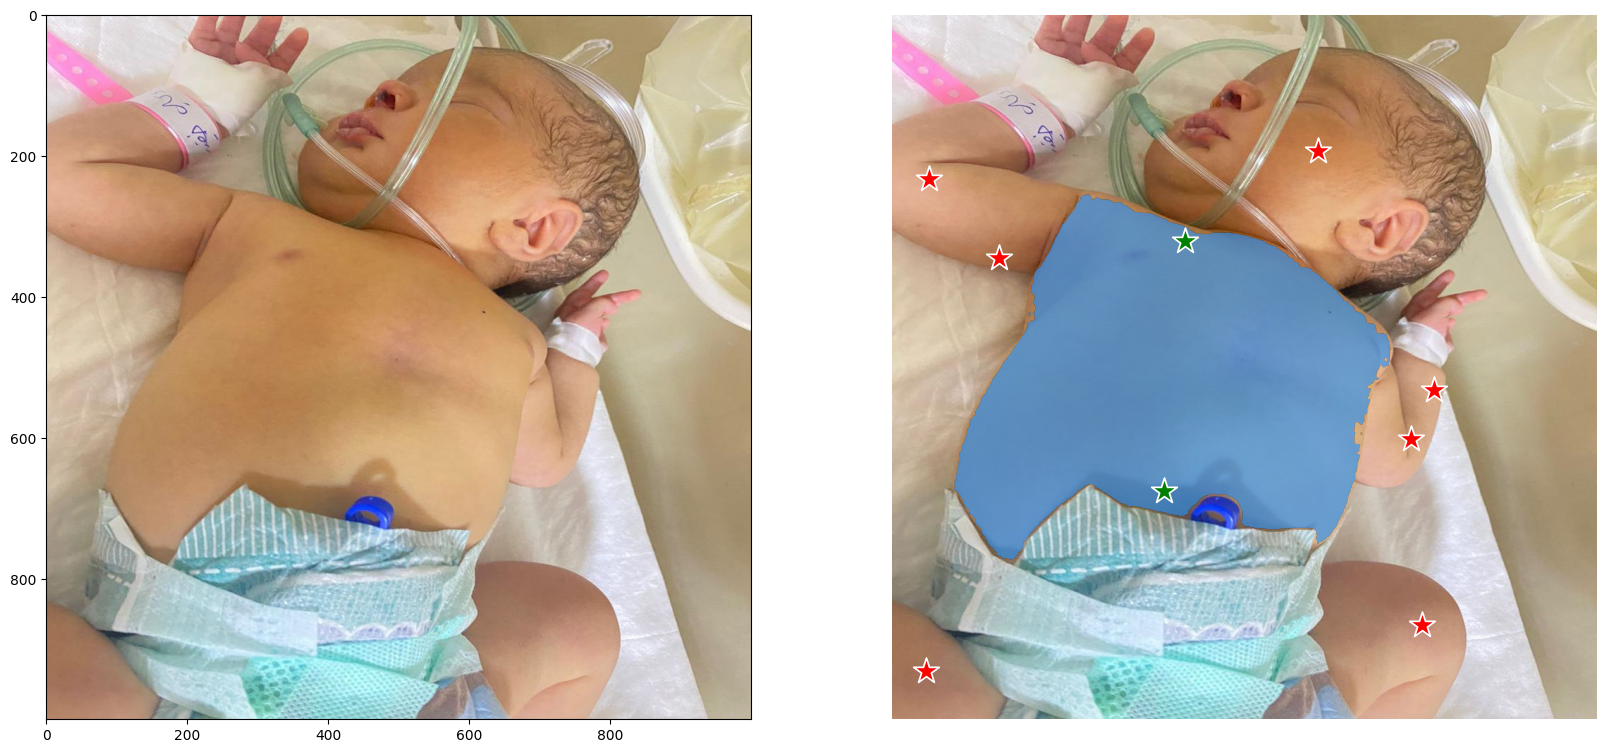

In [ ]:
import numpy as np
img_id = 691
IMAGE_PATH = f"/content/drive/MyDrive/Project_NNJ/Project_NNJ/NData/normal ({img_id}).jpg"
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)
input_point = np.array([
[416, 320],[386, 675],[52, 232],[605, 193],[737, 602],[752, 865],[49, 931],[152, 345],[770, 532]
])
input_label = np.array([1,1,0,0,0,0,0,0,0])

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask

masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(image)
plt.axis('on')
axs[1].imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()


In [ ]:
import os
from PIL import Image
from google.colab import files

# create directory if it doesn't exist
if not os.path.exists('/content/drive/MyDrive/Project_NNJ/Project_NNJ//masked_normal_png'):
    os.makedirs('/content/drive/MyDrive/Project_NNJ/Project_NNJ/masked_normal_png')

if not os.path.exists('/content/drive/MyDrive/Project_NNJ/Project_NNJ//masked_normal_npy'):
    os.makedirs('/content/drive/MyDrive/Project_NNJ/Project_NNJ/masked_normal_npy')


# save masked images with custom name
img = Image.fromarray(masks[0])
img.save(f'/content/drive/MyDrive/Project_NNJ/Project_NNJ/masked_normal_png/masked_normal_{img_id}.png')

folder_path = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/masked_normal_npy'
file_name = f'masked_normal_{img_id}.png.npy'
np.save(f'{folder_path}/{file_name}', img)


# download image
# files.download('../masked_normal/normal_mask_174.png.npy')

# move image to specified location
# !mv ../masked_normal/normal_mask_174.png ../Project_code/NNJ/Normal/masked_normal/


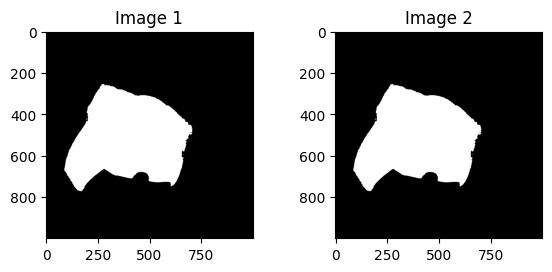

In [ ]:

# Read the first image
image1 = cv2.imread(f'/content/drive/MyDrive/Project_NNJ/Project_NNJ/masked_normal_png/masked_normal_{img_id}.png')

# Read the second image
image2 = np.load(f'/content/drive/MyDrive/Project_NNJ/Project_NNJ/masked_normal_npy/masked_normal_{img_id}.png.npy')

# Check if images were loaded successfully
if image1 is not None and image2 is not None:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2)

    # Display the first image on the left subplot
    axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image 1')

    # Display the second image on the right subplot
    axes[1].imshow(image2, cmap = 'gray')
    axes[1].set_title('Image 2')

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4)

    # Show the figure
    plt.show()
else:
    print('Failed to load one or both images.')


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


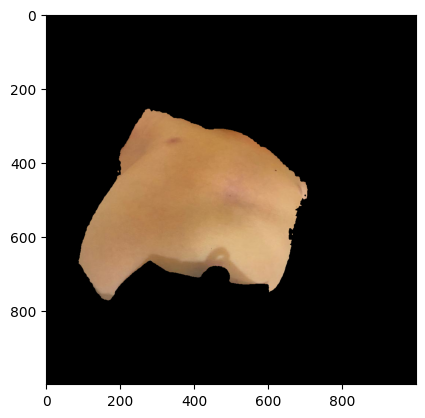

In [ ]:

from matplotlib import pyplot as plt

if not os.path.exists('/content/drive/MyDrive/Project_NNJ/Project_NNJ//Segmented_normal_images'):
    os.makedirs('/content/drive/MyDrive/Segmented_normal_images')


# Load the original image
image = cv2.imread(f"/content/drive/MyDrive/Project_NNJ/Project_NNJ/NData/normal ({img_id}).jpg")

# Load the mask from the PNG file
mask = np.load(f"/content/drive/MyDrive/Project_NNJ/Project_NNJ/masked_normal_npy/masked_normal_{img_id}.png.npy")
print(mask)
mask = mask.astype(np.uint8)
# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Convert the masked image from BGR to RGB color space
masked_image1 = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
cv2.imwrite(f'/content/drive/MyDrive/Project_NNJ/Project_NNJ/Segmented_normal_images/Segmented_normal_image_{img_id}.png', masked_image)
# Show the masked image using matplotlib
plt.imshow(masked_image1)
plt.show()


In [ ]:
import csv
image_name = f"normal ({img_id})"
# File path to save the CSV data
csv_file_path = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/coordinate_of_img.csv'

# Write the data to the CSV file
with open(csv_file_path, 'a', newline='') as file:
    writer = csv.writer(file)

    data = [image_name, str(input_point), str(input_label)]

    # Write the image data to a single row in the CSV file
    writer.writerow(data)


In [ ]:
from google.colab import files
import pandas as pd

# File path of the CSV file
csv_file_path = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/coordinate_of_img.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
print(df)
# row_to_delete = 10  # Index of the row to delete
# df = df.drop(row_to_delete)

# Save the modified DataFrame back to the same CSV file
# df.to_csv('/content/drive/MyDrive/Project_NNJ/Project_NNJ/coordinate_of_img.csv', index=False)
# View the contents of the DataFrame



    normal (1005) [[450, 450], [50, 200], [450, 250], [0, 450], [800, 450]]  \
0   normal (1009)   [[450, 450], [450, 250], [100, 600], [850, 380]]          
1   normal (1010)  [[146, 407], [280, 830], [340, 369], [459, 934...          
2   normal (1011)  [[367, 443], [407, 784], [612, 421], [669, 561...          
3   normal (1014)  [[418 393]\n [527 541]\n [810 451]\n [632 303]...          
4   normal (1017)    [[702 864]\n [754 178]\n [893  37]\n [303 361]]          
5   normal (1018)  [[213 368]\n [ 88 847]\n [542 812]\n [659 469]...          
6   normal (1046)  [[674 696]\n [526 415]\n [747 246]\n [929 443]...          
7   normal (1048)  [[137 509]\n [357 400]\n [509 434]\n [507 753]...          
8   normal (1052)  [[234 535]\n [392 402]\n [590 675]\n [253 275]...          
9   normal (1071)  [[167 436]\n [157 638]\n [374 415]\n [435 612]...          
10  normal (1089)  [[405 549]\n [514 966]\n [207 617]\n [660 434]...          
11  normal (1092)  [[372 472]\n [229 533]\n [644 275

In [ ]:
masks.shape

(1, 1000, 1000)

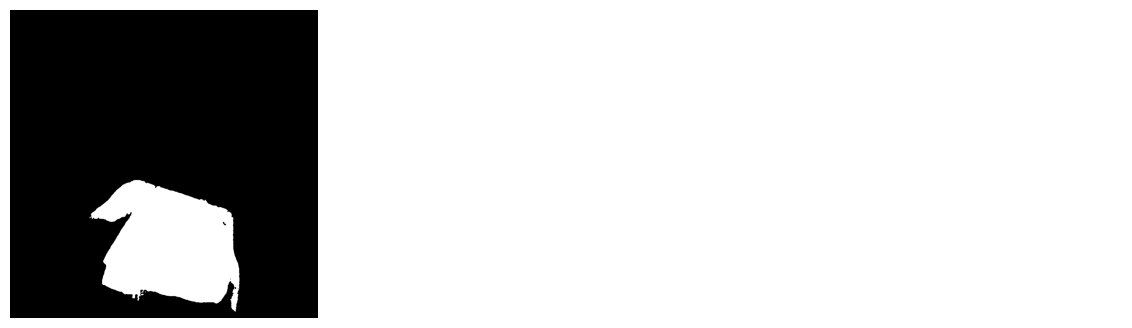

In [ ]:
import supervision as v

sv.plot_images_grid(
    images=masks,
    grid_size=(1, 2),
    size=(16, 4)
)

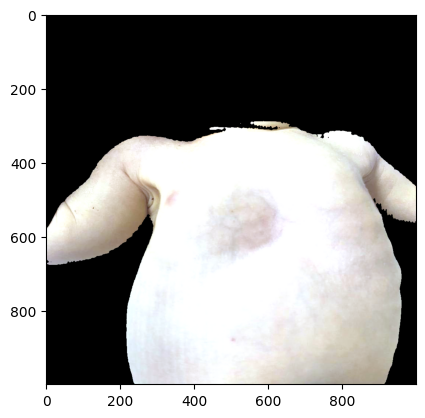

In [ ]:
#using color balancing: gray world assumption, which assumes that the average color of the image should be gray.
# Calculate the average color of the masked image
avg_color = np.mean(masked_image, axis=(0, 1))

# Calculate the scaling factor for each color channel
scale_factor = 128 / avg_color

# Apply the scaling factor to the masked image
balanced_image = np.clip(masked_image * scale_factor, 0, 255).astype(np.uint8)

# Show the balanced image using matplotlib
plt.imshow(balanced_image)
plt.show()

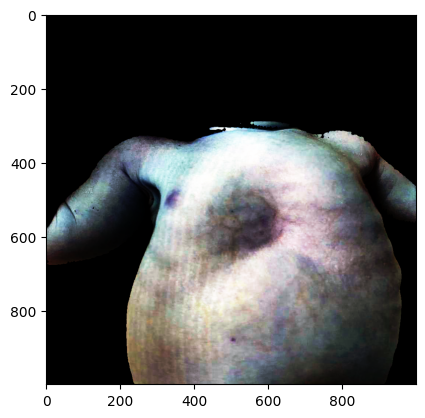

In [ ]:
# Convert the masked image from BGR to RGB color space
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Split the masked image into three color channels
r, g, b = cv2.split(masked_image)

# Apply histogram equalization to each color channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Merge the equalized color channels
equalized_image = cv2.merge((r_eq, g_eq, b_eq))

# Show the equalized image using matplotlib
plt.imshow(equalized_image)
plt.show()

Saving normal (400).jpg to normal (400).jpg


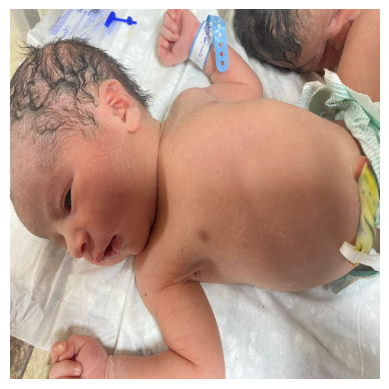

[]


<Figure size 640x480 with 0 Axes>

In [ ]:
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

# Upload the image file
uploaded = files.upload()

# Load the image
image_path = next(iter(uploaded))
img = Image.open(io.BytesIO(uploaded[image_path]))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get user input
points = plt.ginput(3)
print(points)


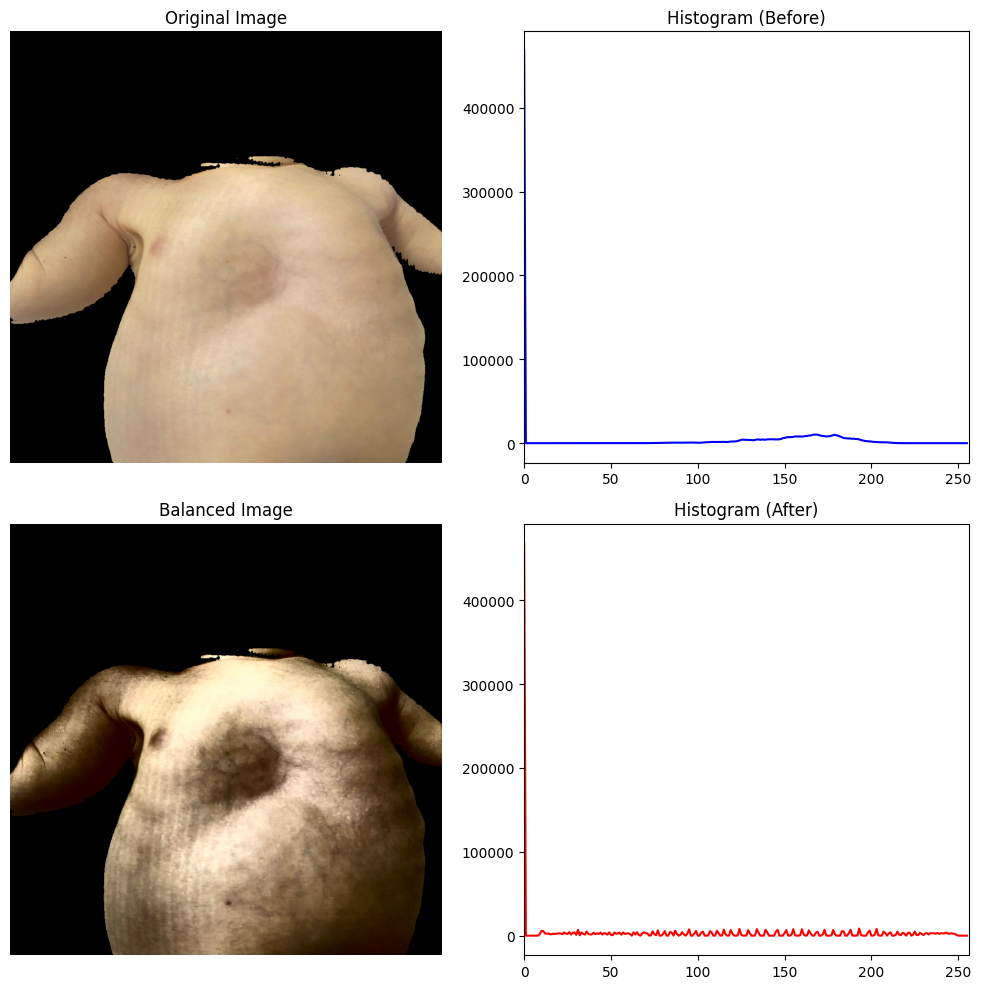

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def balance_image(image):
    # Convert the image to the LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB channels
    L, A, B = cv2.split(lab)

    # Apply histogram equalization to the L channel
    L_eq = cv2.equalizeHist(L)

    # Merge the equalized L channel with the original A and B channels
    lab_eq = cv2.merge([L_eq, A, B])

    # Convert the LAB image back to the BGR color space
    balanced_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    return balanced_image

# Load the input image
image = cv2.imread('/content/drive/MyDrive/masked_normal/masked_image_1004.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale for histogram plotting
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Calculate the histogram of the original image
hist_before = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Balance the image
balanced_image = balance_image(image)

# Convert the balanced image to grayscale for histogram plotting
balanced_gray = cv2.cvtColor(balanced_image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the balanced image
hist_after = cv2.calcHist([balanced_gray], [0], None, [256], [0, 256])

# Display the histograms before and after histogram equalization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].plot(hist_before, color='b')
axes[0, 1].set_title('Histogram (Before)')
axes[0, 1].set_xlim([0, 256])
axes[1, 0].imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Balanced Image')
axes[1, 0].axis('off')
axes[1, 1].plot(hist_after, color='r')
axes[1, 1].set_title('Histogram (After)')
axes[1, 1].set_xlim([0, 256])
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil

# Define the paths to your normal and abnormal image folders
normal_folder = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/Segmented_normal_images'
abnormal_folder = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/Segmented_Jaundice_images'

# Define the output folder for labeled images
output_folder = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/Labeled_folder'

# Create the output folder if it doesn't exist
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# Label normal images as 0
for filename in os.listdir(normal_folder):
    src = os.path.join(normal_folder, filename)
    dst = os.path.join(output_folder, '0_' + filename)  # Add label prefix
    shutil.copy(src, dst)

# Label abnormal images as 1
for filename in os.listdir(abnormal_folder):
    src = os.path.join(abnormal_folder, filename)
    dst = os.path.join(output_folder, '1_' + filename)  # Add label prefix
    shutil.copy(src, dst)


In [ ]:
# Shuffle the labeled images
import random
labeled_images = os.listdir(output_folder)
random.shuffle(labeled_images)

# Split into training and test datasets
train_ratio = 0.8  # Adjust this ratio according to your preference

train_size = int(train_ratio * len(labeled_images))
train_images = labeled_images[:train_size]
test_images = labeled_images[train_size:]

# Split into X_train, y_train, X_test, y_test
X_train = []
y_train = []
X_test = []
y_test = []

for filename in train_images:
    src = os.path.join(output_folder, filename)
    label = int(filename.split('_')[0])  # Extract the label from the filename
    X_train.append(src)
    y_train.append(label)

for filename in test_images:
    src = os.path.join(output_folder, filename)
    label = int(filename.split('_')[0])  # Extract the label from the filename
    X_test.append(src)
    y_test.append(label)

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Set the path to your labeled image folder
labeled_folder = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/Labeled_folder'

# Set the image size
image_size = (512, 512)

# Load the labeled images and corresponding labels
X = []
y = []

for filename in os.listdir(labeled_folder):
    img_path = os.path.join(labeled_folder, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, image_size)
    X.append(img)
    label = int(filename.split('_')[0])
    y.append(label)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the input images
X = X / 255.0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the labels to categorical format
num_classes = 2  # Two classes: normal (0) and abnormal (1)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 8
epochs = 10

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/10
13/13 [==============================] - 8s 195ms/step - loss: 4.0335 - accuracy: 0.6408 - val_loss: 0.4617 - val_accuracy: 0.7692
Epoch 2/10
13/13 [==============================] - 1s 88ms/step - loss: 0.4953 - accuracy: 0.7379 - val_loss: 0.4600 - val_accuracy: 0.8077
Epoch 3/10
13/13 [==============================] - 1s 88ms/step - loss: 0.2998 - accuracy: 0.8447 - val_loss: 0.4427 - val_accuracy: 0.7692
Epoch 4/10
13/13 [==============================] - 1s 86ms/step - loss: 0.1009 - accuracy: 0.9612 - val_loss: 0.4665 - val_accuracy: 0.7692
Epoch 5/10
13/13 [==============================] - 1s 92ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.8596 - val_accuracy: 0.7692
Epoch 6/10
13/13 [==============================] - 1s 87ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.9169 - val_accuracy: 0.7692
Epoch 7/10
13/13 [==============================] - 1s 87ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.9355 - val_accuracy: 0.7308
Epoch 8/10
1

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd

# Set the path to your labeled image folder
labeled_folder = '/content/drive/MyDrive/Project_NNJ/Project_NNJ/Labeled_folder'

# Set the image size
image_size = (128, 128)

# Load the labeled images and corresponding labels
X = []
y = []
image_names = []

for filename in os.listdir(labeled_folder):
    img_path = os.path.join(labeled_folder, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, image_size)
    X.append(img)
    label = int(filename.split('_')[0])
    y.append(label)
    image_names.append(filename)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)
image_names = np.array(image_names)

# Normalize the input images
X = X / 255.0

# Initialize Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Create empty lists to store predicted and actual labels
predicted_labels = []
actual_labels = []

# Iterate over the folds
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build the CNN model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    batch_size = 8
    epochs = 10
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_labels = np.round(y_pred).astype(int).flatten()

    # Append the predicted labels to the list
    # predicted_labels.extend(y_pred_labels)
    # actual_labels.extend(y_test)

# Create a dataframe with actual and predicted labels
df = pd.DataFrame({'Image Name': X_test, 'Actual Label': y_test, 'Predicted Label': y_pred_labels})

print(df)


Epoch 1/10
13/13 [==============================] - 4s 222ms/step - loss: 0.6152 - accuracy: 0.7379
Epoch 2/10
13/13 [==============================] - 4s 306ms/step - loss: 0.4804 - accuracy: 0.7864
Epoch 3/10
13/13 [==============================] - 4s 291ms/step - loss: 0.3743 - accuracy: 0.8058
Epoch 4/10
13/13 [==============================] - 5s 372ms/step - loss: 0.3003 - accuracy: 0.8155
Epoch 5/10
13/13 [==============================] - 3s 214ms/step - loss: 0.1934 - accuracy: 0.9320
Epoch 6/10
13/13 [==============================] - 3s 211ms/step - loss: 0.1301 - accuracy: 0.9515
Epoch 7/10
13/13 [==============================] - 3s 214ms/step - loss: 0.0748 - accuracy: 0.9806
Epoch 8/10
13/13 [==============================] - 4s 295ms/step - loss: 0.0395 - accuracy: 0.9903
Epoch 9/10
13/13 [==============================] - 4s 278ms/step - loss: 0.0277 - accuracy: 0.9903
Epoch 10/10
13/13 [==============================] - 3s 212ms/step - loss: 0.0184 - accuracy: 0.9903

1/1 [==============================] - 0s 378ms/step
Epoch 1/10
13/13 [==============================] - 4s 216ms/step - loss: 0.5792 - accuracy: 0.6990
Epoch 2/10
13/13 [==============================] - 3s 215ms/step - loss: 0.4584 - accuracy: 0.7864
Epoch 3/10
13/13 [==============================] - 3s 212ms/step - loss: 0.3357 - accuracy: 0.7961
Epoch 4/10
13/13 [==============================] - 4s 273ms/step - loss: 0.2281 - accuracy: 0.8835
Epoch 5/10
13/13 [==============================] - 4s 302ms/step - loss: 0.1683 - accuracy: 0.9612
Epoch 6/10
13/13 [==============================] - 3s 212ms/step - loss: 0.0816 - accuracy: 0.9709
Epoch 7/10
13/13 [==============================] - 3s 212ms/step - loss: 0.0340 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 3s 216ms/step - loss: 0.0280 - accuracy: 0.9903
Epoch 9/10
13/13 [==============================] - 5s 390ms/step - loss: 0.0241 - accuracy: 0.9806
Epoch 10/10
1/1 [==============================

ValueError: ignored

In [ ]:
df = pd.DataFrame({'Image Name': image_names, 'Label': y})

print(df[100:])

                             Image Name  Label
100    1_Segmented_Jaundice_image_7.png      1
101   1_Segmented_Jaundice_image_12.png      1
102    1_Segmented_Jaundice_image_2.png      1
103   1_Segmented_Jaundice_image_13.png      1
104   1_Segmented_Jaundice_image_17.png      1
105   1_Segmented_Jaundice_image_21.png      1
106   1_Segmented_Jaundice_image_25.png      1
107   1_Segmented_Jaundice_image_58.png      1
108   1_Segmented_Jaundice_image_63.png      1
109   1_Segmented_Jaundice_image_64.png      1
110   1_Segmented_Jaundice_image_76.png      1
111   1_Segmented_Jaundice_image_78.png      1
112   1_Segmented_Jaundice_image_90.png      1
113  1_Segmented_Jaundice_image_108.png      1
114  1_Segmented_Jaundice_image_111.png      1
115  1_Segmented_Jaundice_image_112.png      1
116  1_Segmented_Jaundice_image_121.png      1
117  1_Segmented_Jaundice_image_125.png      1
118  1_Segmented_Jaundice_image_127.png      1
119  1_Segmented_Jaundice_image_131.png      1
120  1_Segmen

In [ ]:
y_pred_labels

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
len(X_test)

25

In [ ]:
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 